# Import

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as plt

In [2]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('/Data/results_with_users_V3.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'source', 'target', 'flow', 'entropyStoT', 'entropyTtoS',
       'selfEntropyT', 'selfEntropyS', 'Key', 'username_source',
       'author_followers_source', 'author_tweets_source',
       'author_following_source', 'author_listed_source',
       'author_description_source', 'author_location_source',
       'author_private_source', 'author_verified_source',
       'author_account_creation_source', 'Year_creation_source',
       'FF_ratio2_source', 'FF_Ratio_source', 'TweetsNb_source',
       'Likes_avrg_source', 'Retweets_Avg_source', 'Replies_avg_source',
       'Quote_count_avg_source', 'username_target', 'author_followers_target',
       'author_tweets_target', 'author_following_target',
       'author_listed_target', 'author_description_target',
       'author_location_target', 'author_private_target',
       'author_verified_target', 'author_account_creation_target',
       'Year_creation_target', 'FF_ratio2_target', 'FF_Ratio_target',
       'TweetsNb_target',

In [5]:
columns = ['flow', 'selfEntropyT', 'selfEntropyS','author_followers_source', 'author_tweets_source',
       'author_following_source', 'author_listed_source', 'FF_Ratio_source',
       'FF_ratio2_source', 'TweetsNb_source', 'author_followers_target',
       'author_tweets_target', 'author_following_target',
       'author_listed_target', 'FF_Ratio_target', 'FF_ratio2_target',
       'TweetsNb_target']

In [6]:
#Remove the outliers

In [7]:
len(df)

79242

In [8]:
df_filtered = df

In [9]:
lst = [1385205739640131584,1234489772183343104,408382525,230190058,1143396858208800768,3240197969,
       188251389,904540565307617280,988869330,125922216,1382981076251971584,965548724247191552,1408890653887586306,
      1347927540988571649,1373262453161799686,781471603662196736,1455248470776877064,1355566985845694468,
      1057622011395084289,1262806249164255232,410377944,28803148,1436903038069903364,1410288349076721675,
      1413540569444356101,1405131947790290947,4727914933,1247885277374251009,1192824698024927233,
      38448943,1299632796844077057,1112983458433781761,2892043241,1174914666587250688,986040298462728193,38152701]

In [10]:
len(lst)

36

In [11]:
df_filtered = df_filtered[~df_filtered['target'].isin(lst)]

In [12]:
df_filtered = df_filtered[~df_filtered['source'].isin(lst)]

In [13]:
len(df_filtered)

67860

In [14]:
q = df_filtered.flow.quantile(0.95)

In [15]:
q

2.7013930382891607

In [16]:
df_filtered = df_filtered[df_filtered['flow']<q]

In [17]:
# on est passé de 64262 à 48620

[1421078983953821699,1273561391539027968,1444478296926801920,902602129,1430912164101980162,1432810936792879105,
1396769368575410177,]

In [18]:
len(df)

79242

In [19]:
len(df_filtered)

64467

In [20]:
df1 = df[df['flow']>0]

In [21]:
pd.options.mode.chained_assignment = None 

In [22]:
df2 = df_filtered[df_filtered['flow']>0]

In [23]:
# plot without filtering

array([[<AxesSubplot:title={'center':'flow'}>,
        <AxesSubplot:title={'center':'selfEntropyT'}>,
        <AxesSubplot:title={'center':'selfEntropyS'}>,
        <AxesSubplot:title={'center':'author_followers_source'}>],
       [<AxesSubplot:title={'center':'author_tweets_source'}>,
        <AxesSubplot:title={'center':'author_following_source'}>,
        <AxesSubplot:title={'center':'author_listed_source'}>,
        <AxesSubplot:title={'center':'FF_Ratio_source'}>],
       [<AxesSubplot:title={'center':'FF_ratio2_source'}>,
        <AxesSubplot:title={'center':'TweetsNb_source'}>,
        <AxesSubplot:title={'center':'author_followers_target'}>,
        <AxesSubplot:title={'center':'author_tweets_target'}>],
       [<AxesSubplot:title={'center':'author_following_target'}>,
        <AxesSubplot:title={'center':'author_listed_target'}>,
        <AxesSubplot:title={'center':'FF_Ratio_target'}>,
        <AxesSubplot:title={'center':'FF_ratio2_target'}>],
       [<AxesSubplot:title={'ce

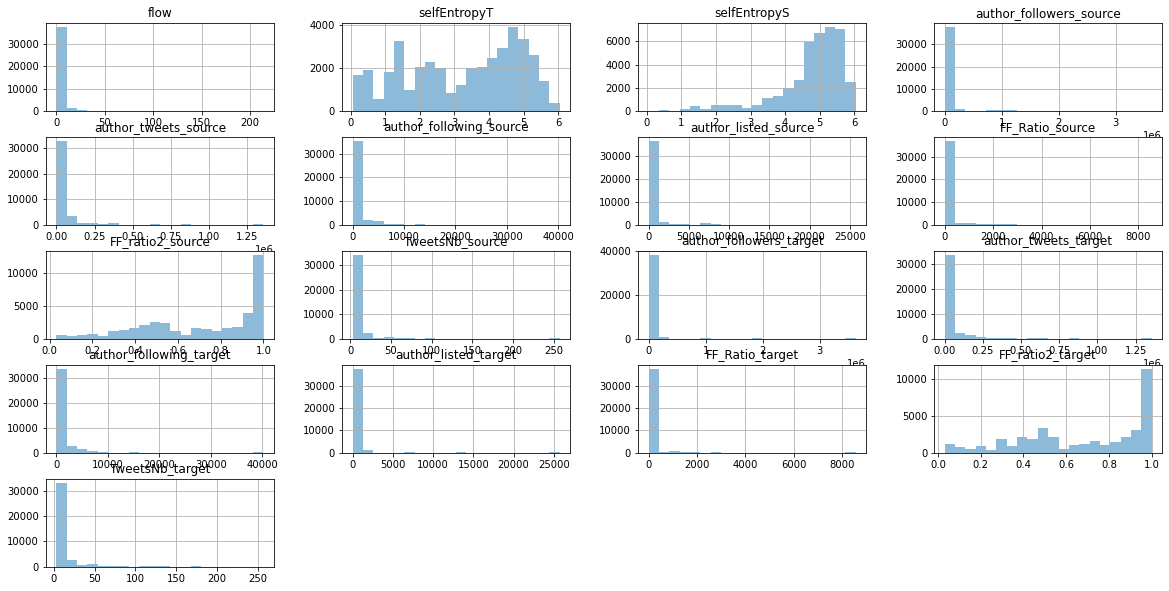

In [24]:
df[df['flow']>0][columns].hist(bins = 20, alpha = 0.5,figsize=(20,10))

In [25]:
# plot with filtering

array([[<AxesSubplot:title={'center':'flow'}>,
        <AxesSubplot:title={'center':'selfEntropyT'}>,
        <AxesSubplot:title={'center':'selfEntropyS'}>,
        <AxesSubplot:title={'center':'author_followers_source'}>],
       [<AxesSubplot:title={'center':'author_tweets_source'}>,
        <AxesSubplot:title={'center':'author_following_source'}>,
        <AxesSubplot:title={'center':'author_listed_source'}>,
        <AxesSubplot:title={'center':'FF_Ratio_source'}>],
       [<AxesSubplot:title={'center':'FF_ratio2_source'}>,
        <AxesSubplot:title={'center':'TweetsNb_source'}>,
        <AxesSubplot:title={'center':'author_followers_target'}>,
        <AxesSubplot:title={'center':'author_tweets_target'}>],
       [<AxesSubplot:title={'center':'author_following_target'}>,
        <AxesSubplot:title={'center':'author_listed_target'}>,
        <AxesSubplot:title={'center':'FF_Ratio_target'}>,
        <AxesSubplot:title={'center':'FF_ratio2_target'}>],
       [<AxesSubplot:title={'ce

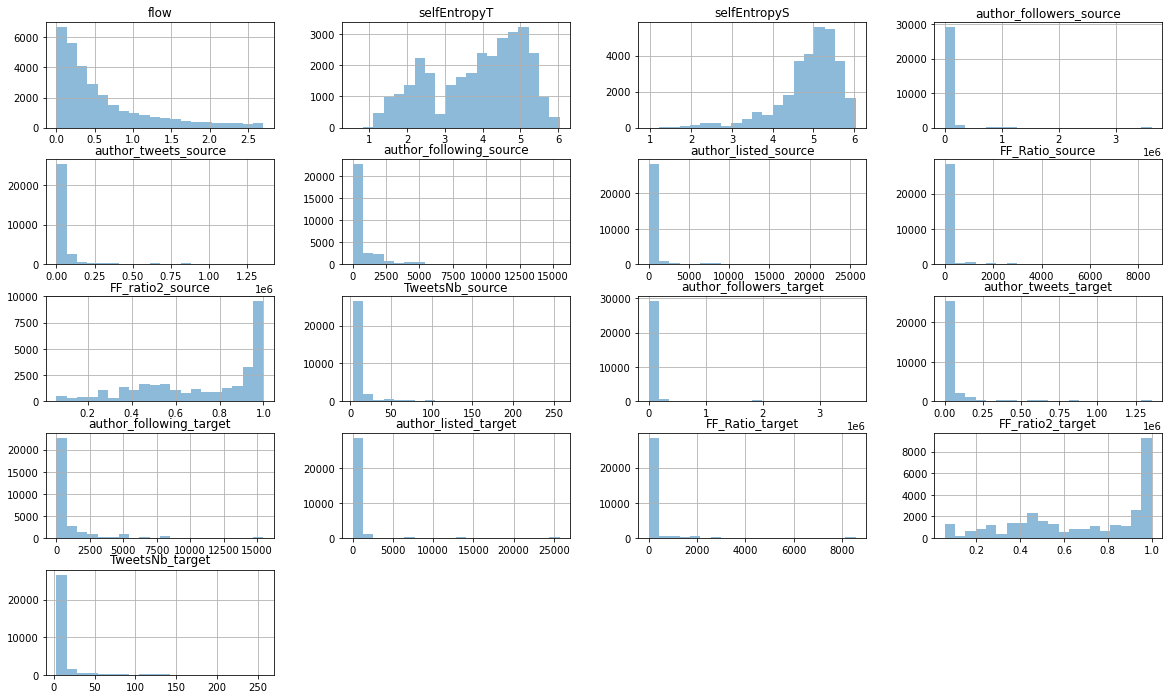

In [26]:
df_filtered[df_filtered['flow']>0][columns].hist(bins = 20, alpha = 0.5,figsize=(20,12))

In [27]:
col = ['selfEntropyS','flow']

array([[<AxesSubplot:title={'center':'selfEntropyS'}>,
        <AxesSubplot:title={'center':'flow'}>]], dtype=object)

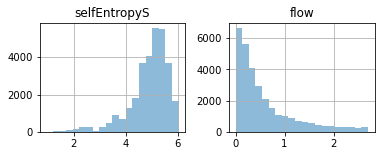

In [28]:
df_filtered[df_filtered['flow']>0][col].hist(bins = 20, alpha = 0.5,figsize=(6,2))

# Calculate the MSE 

MSE Calculation with Train test and all the int columns 

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Select the columns to use as the independent variables
X = df[df['flow']>0][columns].drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df[df['flow']>0][columns]['flow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print(f'Mean squared error: {mse}')


Mean squared error: 142.01091198159335


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Select the columns to use as the independent variables
X = df_filtered[df_filtered['flow']>0][columns].drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df_filtered[df_filtered['flow']>0][columns]['flow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print(f'Mean squared error: {mse}')



Mean squared error: 0.11896351257353363


# Normalization

In [553]:
# without filter

In [31]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit the scaler to the data
scaler.fit(df1[columns])

# transform the data using the scaler
df1[columns] = scaler.transform(df1[columns])

In [32]:
# Select the columns to use as the independent variables
X = df1[columns].drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df1[columns]['flow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a LinearRegression model
model_norm = LinearRegression()

# Fit the model to the training data
model_norm.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model_norm.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print(f'Mean squared error: {mse}')

Mean squared error: 0.002784312231618913


In [34]:
from sklearn.linear_model import LinearRegression

# Select the columns to use as the independent variables
X = df1[columns].drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df1[columns]['flow']

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Create a table with the coefficients and features
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})

print(coefficients)

                    feature  coefficient
0              selfEntropyT    -0.082015
1              selfEntropyS     0.002080
2   author_followers_source     0.007737
3      author_tweets_source    -0.005822
4   author_following_source     0.016124
5      author_listed_source    -0.013903
6           FF_Ratio_source     0.002524
7          FF_ratio2_source     0.003083
8           TweetsNb_source     0.017768
9   author_followers_target     0.075808
10     author_tweets_target    -0.059185
11  author_following_target    -0.040113
12     author_listed_target    -0.040135
13          FF_Ratio_target     0.011886
14         FF_ratio2_target    -0.020600
15          TweetsNb_target     0.141056


In [35]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit the scaler to the data
scaler.fit(df2[columns])

# transform the data using the scaler
df2[columns] = scaler.transform(df2[columns])

In [36]:
# Select the columns to use as the independent variables
X = df2[columns].drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df2[columns]['flow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a LinearRegression model
model_norm = LinearRegression()

# Fit the model to the training data
model_norm.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model_norm.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print(f'Mean squared error: {mse}')

Mean squared error: 0.015646189236780718


In [38]:
from sklearn.linear_model import LinearRegression

# Select the columns to use as the independent variables
X = df2[columns].drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df2[columns]['flow']

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Create a table with the coefficients and features
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})

print(coefficients)

                    feature  coefficient
0              selfEntropyT    -0.927877
1              selfEntropyS     0.383839
2   author_followers_source     0.230596
3      author_tweets_source    -0.028999
4   author_following_source     0.031702
5      author_listed_source    -0.298371
6           FF_Ratio_source     0.033293
7          FF_ratio2_source     0.026725
8           TweetsNb_source     0.256117
9   author_followers_target    -0.284245
10     author_tweets_target     0.039923
11  author_following_target    -0.025577
12     author_listed_target     0.120593
13          FF_Ratio_target     0.119181
14         FF_ratio2_target    -0.008741
15          TweetsNb_target    -0.104190


## Visualize Norm

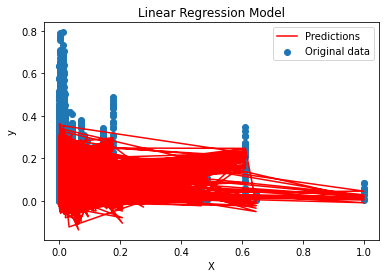

In [591]:
import matplotlib.pyplot as plt
# Visualize the model
plt.scatter(X_test['author_tweets_target'], y_test, label='Original data')
plt.plot(X_test['author_tweets_target'], predictions, color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

# Standardizer

In [39]:
dfs = df[df['flow']>0]

In [40]:
dfs = dfs[columns]

In [41]:
for col in columns:
    if col != 'flow' :   
        dfs[col] = (dfs[col]- dfs[col].mean())/dfs[col].std()

In [42]:
df_filtered_std = df_filtered[df_filtered['flow']>0]

In [43]:
df_filtered_std = df_filtered_std[columns]

In [44]:
for col in columns:
    if col != 'flow' :   
        df_filtered_std[col] = (df_filtered_std[col]- df_filtered_std[col].mean())/df[col].std()

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Select the columns to use as the independent variables
X = dfs.drop('flow', axis = 1) 

# Select the column to use as the dependent variable
y = dfs['flow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a LinearRegression model
model_std = LinearRegression()

# Fit the model to the training data
model_std.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model_std.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print(f'Mean squared error: {mse}')



Mean squared error: 146.61032170954292


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Select the columns to use as the independent variables
X = df_filtered_std.drop('flow', axis = 1) 

# Select the column to use as the dependent variable
y = df_filtered_std['flow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a LinearRegression model
model_std = LinearRegression()

# Fit the model to the training data
model_std.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model_std.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print(f'Mean squared error: {mse}')




Mean squared error: 0.11453934540841763


In [48]:
from sklearn.linear_model import LinearRegression

# Select the columns to use as the independent variables
X = df_filtered_std[columns].drop('flow', axis = 1) 

# Select the column to use as the dependent variable
y = df_filtered_std[columns]['flow']

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Create a table with the coefficients and features
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})

print(coefficients)

                    feature  coefficient
0              selfEntropyT    -0.706121
1              selfEntropyS     0.314944
2   author_followers_source     0.046226
3      author_tweets_source    -0.008986
4   author_following_source     0.016800
5      author_listed_source    -0.063501
6           FF_Ratio_source     0.006749
7          FF_ratio2_source     0.021778
8           TweetsNb_source     0.070795
9   author_followers_target    -0.056980
10     author_tweets_target     0.012372
11  author_following_target    -0.013554
12     author_listed_target     0.025665
13          FF_Ratio_target     0.024161
14         FF_ratio2_target    -0.007123
15          TweetsNb_target    -0.028800


# Feature Selection

# F regression

## baseline filtered

In [49]:
from sklearn.feature_selection import f_regression

# Select the columns to use as the independent variables
X = df_filtered[columns].drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df_filtered['flow']

# Calculate the F-value and p-value for each feature
f_values, p_values = f_regression(X, y)

# Print the p-values
print('f_values_norm : ',f_values)
print('p_values_norm : ',p_values)

f_values_norm :  [2.30086283e+02 8.43106280e+03 1.22666197e+01 4.73836622e+01
 3.66625605e+01 1.77718144e+01 2.57728859e+01 1.13528029e+01
 4.31180126e+03 7.21763725e-01 2.18062899e-01 1.48115652e-01
 2.90749503e-02 1.17809842e-01 5.84790492e+00 2.61669766e+00]
p_values_norm :  [7.01856877e-52 0.00000000e+00 4.61444772e-04 5.88987511e-12
 1.41224577e-09 2.49384333e-05 3.85112043e-07 7.53783180e-04
 0.00000000e+00 3.95569139e-01 6.40521451e-01 7.00343922e-01
 8.64606631e-01 7.31423259e-01 1.55983601e-02 1.05749196e-01]


# 1 feature for p value 

In [649]:
columns

['flow',
 'selfEntropyT',
 'selfEntropyS',
 'author_followers_source',
 'author_tweets_source',
 'author_following_source',
 'author_listed_source',
 'FF_Ratio_source',
 'FF_ratio2_source',
 'TweetsNb_source_users',
 'author_followers_target',
 'author_tweets_target',
 'author_following_target',
 'author_listed_target',
 'FF_Ratio_target',
 'FF_ratio2_target',
 'TweetsNb_source_target']

In [50]:
columns_ref

NameError: name 'columns_ref' is not defined

In [666]:
col = ['author_followers_target','author_followers_source','flow']

In [667]:
from sklearn.feature_selection import f_regression

# Select the columns to use as the independent variables
X = df_filtered[col].drop('flow',axis=1)

# Select the column to use as the dependent variable
y = df_filtered['flow']

# Calculate the F-value and p-value for each feature
f_values, p_values = f_regression(X, y)

# Print the p-values
print('f_values_norm : ',f_values)
print('p_values_norm : ',p_values)

f_values_norm :  [27.91417042 27.91417042]
p_values_norm :  [1.27362599e-07 1.27362599e-07]


# std

In [51]:
from sklearn.feature_selection import f_regression

# Select the columns to use as the independent variables
X = dfs.drop('flow', axis=1)

# Select the column to use as the dependent variable
y = dfs['flow']

# Calculate the F-value and p-value for each feature
f_values_std, p_values_std = f_regression(X, y)

# Print the p-values
print('f_values_norm : ',f_values_std)
print('p_values_norm : ',p_values_std)

f_values_norm :  [7.48157150e+03 8.74925511e+02 4.22288115e-04 1.82168643e-01
 1.76485894e+01 4.54114073e-02 5.10983441e-04 2.27771039e+00
 2.30249050e+01 3.57302120e+01 1.07182289e+02 1.37279190e+01
 3.71268258e+01 6.64279330e+01 2.84268940e+02 2.97545787e+03]
p_values_norm :  [0.00000000e+000 3.27304611e-190 9.83605009e-001 6.69518448e-001
 2.66293016e-005 8.31250432e-001 9.81965515e-001 1.31253476e-001
 1.60497818e-006 2.28555857e-009 4.37107672e-025 2.11577312e-004
 1.11708517e-009 3.73468961e-016 1.46991768e-063 0.00000000e+000]


In [52]:
from sklearn.feature_selection import f_regression

# Select the columns to use as the independent variables
X = df_filtered_std.drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df_filtered_std['flow']

# Calculate the F-value and p-value for each feature
f_values_std, p_values_std = f_regression(X, y)

# Print the p-values
print('f_values_norm : ',f_values_std)
print('p_values_norm : ',p_values_std)

f_values_norm :  [5.11955842e+04 4.73459372e+02 3.49044731e-02 8.52214385e+00
 3.54288843e+00 1.75992595e-02 4.65928321e-03 1.98187925e+00
 2.72513177e+01 2.16173826e+00 4.10427089e+01 2.18242575e+02
 2.31801138e-01 1.09250226e+00 1.36821754e+01 8.12228793e+02]
p_values_norm :  [0.00000000e+000 3.50949377e-104 8.51797213e-001 3.51107157e-003
 5.98107384e-002 8.94461412e-001 9.45579954e-001 1.59202752e-001
 1.79821289e-007 1.41494860e-001 1.51105633e-010 3.23465403e-049
 6.30194966e-001 2.95925727e-001 2.16879116e-004 2.42100529e-176]


## norm

In [53]:
from sklearn.feature_selection import f_regression

# Select the columns to use as the independent variables
X = df1[columns].drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df1[columns]['flow']

# Calculate the F-value and p-value for each feature
f_values_norm, p_values_norm = f_regression(X, y)

# Print the p-values
print('f_values_norm : ',f_values_norm)
print('p_values_norm : ',p_values_norm)

f_values_norm :  [7.48157150e+03 8.74925511e+02 4.22288115e-04 1.82168643e-01
 1.76485894e+01 4.54114073e-02 5.10983441e-04 2.27771039e+00
 2.30249050e+01 3.57302120e+01 1.07182289e+02 1.37279190e+01
 3.71268258e+01 6.64279330e+01 2.84268940e+02 2.97545787e+03]
p_values_norm :  [0.00000000e+000 3.27304611e-190 9.83605009e-001 6.69518448e-001
 2.66293016e-005 8.31250432e-001 9.81965515e-001 1.31253476e-001
 1.60497818e-006 2.28555857e-009 4.37107672e-025 2.11577312e-004
 1.11708517e-009 3.73468961e-016 1.46991768e-063 0.00000000e+000]


In [54]:
from sklearn.feature_selection import f_regression

# Select the columns to use as the independent variables
X = df2[columns].drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df2[columns]['flow']

# Calculate the F-value and p-value for each feature
f_values_norm, p_values_norm = f_regression(X, y)

# Print the p-values
print('f_values_norm : ',f_values_norm)
print('p_values_norm : ',p_values_norm)

f_values_norm :  [5.11955842e+04 4.73459372e+02 3.49044731e-02 8.52214385e+00
 3.54288843e+00 1.75992595e-02 4.65928321e-03 1.98187925e+00
 2.72513177e+01 2.16173826e+00 4.10427089e+01 2.18242575e+02
 2.31801138e-01 1.09250226e+00 1.36821754e+01 8.12228793e+02]
p_values_norm :  [0.00000000e+000 3.50949377e-104 8.51797213e-001 3.51107157e-003
 5.98107384e-002 8.94461412e-001 9.45579954e-001 1.59202752e-001
 1.79821289e-007 1.41494860e-001 1.51105633e-010 3.23465403e-049
 6.30194966e-001 2.95925727e-001 2.16879116e-004 2.42100529e-176]


# Lasso

## std

In [55]:
from sklearn.linear_model import Lasso

# Select the columns to use as the independent variables
X = dfs.drop('flow', axis = 1) 

# Select the column to use as the dependent variable
y = dfs['flow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a Lasso model
model_std = Lasso(alpha=0.1)

# Fit the model to the training data
model_std.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model_std.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print(f'Mean squared error: {mse}')

Mean squared error: 131.8016322851065


In [56]:
from sklearn.linear_model import Lasso

# Select the columns to use as the independent variables
X = df_filtered_std.drop('flow', axis = 1) 

# Select the column to use as the dependent variable
y = df_filtered_std['flow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a Lasso model
model_std = Lasso(alpha=0.1)

# Fit the model to the training data
model_std.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model_std.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print(f'Mean squared error: {mse}')

Mean squared error: 0.15529808608106055


## norm

In [57]:
from sklearn.linear_model import Lasso

# Select the columns to use as the independent variables
X = df1[columns].drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df1[columns]['flow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a Lasso model
model_norm = Lasso(alpha=0.1)

# Fit the model to the training data
model_norm.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model_norm.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print(f'Mean squared error: {mse}')

Mean squared error: 0.003940175133555337


In [58]:
from sklearn.linear_model import Lasso

# Select the columns to use as the independent variables
X = df2[columns].drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df2[columns]['flow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a Lasso model
model_norm = Lasso(alpha=0.1)

# Fit the model to the training data
model_norm.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model_norm.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print(f'Mean squared error: {mse}')

Mean squared error: 0.0516818383958039


# RFE

## std

In [59]:
from sklearn.feature_selection import RFE
# Use recursive feature elimination to select the best features
rfe_std = RFE(model_std, n_features_to_select=10)
rfe_std = rfe_std.fit(X, y)

# Print the selected features
print(rfe_std.support_)

# Print the ranking of the features
print(rfe_std.ranking_)

[False False False False False False  True  True  True  True  True  True
  True  True  True  True]
[7 6 5 4 3 2 1 1 1 1 1 1 1 1 1 1]


## norm

In [60]:
from sklearn.feature_selection import RFE
# Use recursive feature elimination to select the best features
rfe_norm = RFE(model_norm, n_features_to_select=10)
rfe_norm = rfe_norm.fit(X, y)

# Print the selected features
print(rfe_norm.support_)

# Print the ranking of the features
print(rfe_norm.ranking_)

[False False False False False False  True  True  True  True  True  True
  True  True  True  True]
[7 6 5 4 3 2 1 1 1 1 1 1 1 1 1 1]


meme resultats pr std et norm de rfe

# utiliser seulement les ref pour la mse 

In [61]:
columns

['flow',
 'selfEntropyT',
 'selfEntropyS',
 'author_followers_source',
 'author_tweets_source',
 'author_following_source',
 'author_listed_source',
 'FF_Ratio_source',
 'FF_ratio2_source',
 'TweetsNb_source',
 'author_followers_target',
 'author_tweets_target',
 'author_following_target',
 'author_listed_target',
 'FF_Ratio_target',
 'FF_ratio2_target',
 'TweetsNb_target']

In [62]:
columns_ref = ['flow',
 'author_listed_source',
 'FF_Ratio_source',
 'FF_ratio2_source',
 'TweetsNb_source',
 'author_followers_target',
 'author_tweets_target',
 'author_following_target',
 'author_listed_target',
 'FF_Ratio_target',
 'FF_ratio2_target',
 'TweetsNb_target']

on tej 'author_followers_source','author_tweets_source','author_following_source' due a rfe

In [63]:
# Select the columns to use as the independent variables
X = df1[columns_ref].drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df1[columns_ref]['flow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a LinearRegression model
model_norm = LinearRegression()

# Fit the model to the training data
model_norm.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model_norm.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print(f'Mean squared error: {mse}')

Mean squared error: 0.0034338499390386057


In [64]:
# Select the columns to use as the independent variables
X = df2[columns_ref].drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df2[columns_ref]['flow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a LinearRegression model
model_norm = LinearRegression()

# Fit the model to the training data
model_norm.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model_norm.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print(f'Mean squared error: {mse}')

Mean squared error: 0.05009092863261437


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Select the columns to use as the independent variables
X = dfs[columns_ref].drop('flow', axis = 1) 

# Select the column to use as the dependent variable
y = dfs[columns_ref]['flow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a LinearRegression model
model_std = LinearRegression()

# Fit the model to the training data
model_std.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model_std.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print(f'Mean squared error: {mse}')




Mean squared error: 161.84737439619357


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Select the columns to use as the independent variables
X = df_filtered_std[columns_ref].drop('flow', axis = 1) 

# Select the column to use as the dependent variable
y = df_filtered_std[columns_ref]['flow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a LinearRegression model
model_std = LinearRegression()

# Fit the model to the training data
model_std.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model_std.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print(f'Mean squared error: {mse}')





Mean squared error: 0.3708190085233997


In [67]:
len(df)

79242

In [68]:
len(df_filtered)

64467

# Choosing only the Significant p values 

In [642]:
p_val_sign = ['flow','selfEntropyT','selfEntropyS','author_followers_source','author_tweets_source',
              'author_following_source','FF_Ratio_source','TweetsNb_source_users','author_followers_target',
              'author_tweets_target','author_following_target','FF_Ratio_target','TweetsNb_source_target']

In [648]:
# normaliser + filtered + only significant p values 

In [646]:
# Select the columns to use as the independent variables
X = df2[p_val_sign].drop('flow', axis=1)

# Select the column to use as the dependent variable
y = df2[p_val_sign]['flow']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a LinearRegression model
model_norm = LinearRegression()

# Fit the model to the training data
model_norm.fit(X_train, y_train)

# Use the model to make predictions on the test data
predictions = model_norm.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

print(f'Mean squared error: {mse}')

Mean squared error: 0.005598975213701914
